# 1.3 计算语言：简单的统计

In [25]:
from nltk import *
from nltk.book import *

In [2]:
saying = ['After', 'all', 'is', 'said', 'and', 'done',
          'more', 'is', 'said', 'than', 'done']
tokens = set(saying)
tokens = sorted(tokens)
tokens[-2:]

['said', 'than']

# 频率分布
它告诉我们在文本中的每一个词项的频率。（一般情况
下，它能计数任何观察得到的事件。）这是一个“分布”因为它告诉我们文本中词标识符的总数是如何分布在词项中的。

In [4]:
# 传递文本的名称作为参数
fdist1 = FreqDist(text1)

# 计算出来的《白鲸记》中的总的词数（“结果”）——高达260,819
fdist1

FreqDist({'[': 3,
          'Moby': 84,
          'Dick': 84,
          'by': 1137,
          'Herman': 1,
          'Melville': 1,
          '1851': 3,
          ']': 1,
          'ETYMOLOGY': 1,
          '.': 6862,
          '(': 210,
          'Supplied': 2,
          'a': 4569,
          'Late': 1,
          'Consumptive': 1,
          'Usher': 2,
          'to': 4542,
          'Grammar': 2,
          'School': 1,
          ')': 78,
          'The': 612,
          'pale': 18,
          '--': 1070,
          'threadbare': 1,
          'in': 3916,
          'coat': 28,
          ',': 18713,
          'heart': 90,
          'body': 110,
          'and': 6024,
          'brain': 37,
          ';': 4072,
          'I': 2124,
          'see': 253,
          'him': 1058,
          'now': 646,
          'He': 230,
          'was': 1632,
          'ever': 203,
          'dusting': 2,
          'his': 2459,
          'old': 436,
          'lexicons': 1,
          'grammars': 2,
          '

In [12]:
# 文本中所有不同类型的链表
vocabulary1 = list(fdist1.keys())

# 通过切片看看这个链表的前50项
vocabulary1[:50]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'Grammar',
 'School',
 ')',
 'The',
 'pale',
 '--',
 'threadbare',
 'in',
 'coat',
 ',',
 'heart',
 'body',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'grammars',
 'with',
 'queer',
 'handkerchief',
 'mockingly',
 'embellished',
 'all']

In [13]:
fdist1['whale']

906

In [14]:
fdist2 = FreqDist(text2)
vocabulary2 = list(fdist2.keys())
vocabulary2[:50]

['[',
 'Sense',
 'and',
 'Sensibility',
 'by',
 'Jane',
 'Austen',
 '1811',
 ']',
 'CHAPTER',
 '1',
 'The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.',
 'Their',
 'estate',
 'was',
 'large',
 ',',
 'their',
 'residence',
 'at',
 'Norland',
 'Park',
 'the',
 'centre',
 'property',
 'where',
 'for',
 'many',
 'generations',
 'they',
 'lived',
 'so',
 'respectable',
 'a',
 'manner',
 'as',
 'to',
 'engage',
 'general',
 'good']

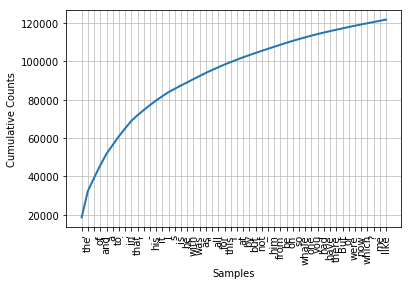

In [15]:
# @cumulative 累计的
fdist1.plot(50, cumulative=True)

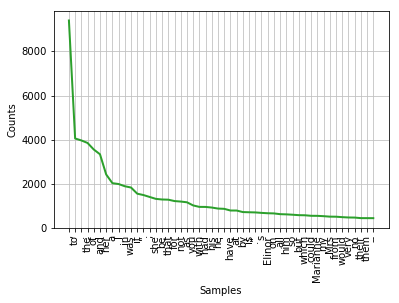

In [18]:
fdist2.plot(50, cumulative=False)

In [19]:
# 些只出现了一次的词（所谓的hapaxes）
fdist1.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


# 细粒度的选择词

In [20]:
# {w | w ∈ V & P(w)} 数学集合符号表示我们感兴趣的词汇。
# 此集合中所有w 都满足w 是集合V（词汇表）的一个元素且w 有性质P
V = set(text1)

# [w for w in V if p(w)] 给出了对应的Python 表达式。
# 请注意，它产生一个链表，而不是集合，这意味着可能会有相同的元素。
long_words = [w for w in V if len(w) > 15]

sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

In [21]:
# 有长度超过7 个字符出现次数超过7 次的词
fdist5 = FreqDist(text5)
sorted([w for w in set(fdist5) if len(w) > 7 and fdist5[w] > 7])

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

# 词语搭配和双连词（bigrams）

一个搭配是异乎寻常的经常在一起出现的词序列。一个搭配的特点是其中的词不能被类似的词置换。

In [27]:
bigrams(['more', 'is', 'said', 'than', 'done'])

<generator object bigrams at 0x000000000DECEA98>

In [29]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [31]:
# 找到比我们基于单个词的频率预期得到的更频繁出现的双连词
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [32]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


# 计数其他东西

计数词汇是有用的，我们也可以计数其他东西

In [33]:
# 每个词的长度的链表
[len(w) for w in text1]

[1,
 4,
 4,
 2,
 6,
 8,
 4,
 1,
 9,
 1,
 1,
 8,
 2,
 1,
 4,
 11,
 5,
 2,
 1,
 7,
 6,
 1,
 3,
 4,
 5,
 2,
 10,
 2,
 4,
 1,
 5,
 1,
 4,
 1,
 3,
 5,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 7,
 3,
 3,
 8,
 3,
 8,
 1,
 4,
 1,
 5,
 12,
 1,
 9,
 11,
 4,
 3,
 3,
 3,
 5,
 2,
 3,
 3,
 5,
 7,
 2,
 3,
 5,
 1,
 2,
 5,
 2,
 4,
 3,
 3,
 8,
 1,
 2,
 7,
 6,
 8,
 3,
 2,
 3,
 9,
 1,
 1,
 5,
 3,
 4,
 2,
 4,
 2,
 6,
 6,
 1,
 3,
 2,
 5,
 4,
 2,
 4,
 4,
 1,
 5,
 1,
 4,
 2,
 2,
 2,
 6,
 2,
 3,
 6,
 7,
 3,
 1,
 7,
 9,
 1,
 3,
 6,
 1,
 1,
 5,
 6,
 5,
 6,
 3,
 13,
 2,
 3,
 4,
 1,
 3,
 7,
 4,
 5,
 2,
 3,
 4,
 2,
 2,
 8,
 1,
 5,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 4,
 1,
 4,
 6,
 2,
 5,
 4,
 9,
 2,
 7,
 1,
 3,
 2,
 3,
 1,
 5,
 2,
 6,
 2,
 7,
 2,
 2,
 7,
 1,
 1,
 10,
 1,
 5,
 1,
 3,
 2,
 2,
 4,
 11,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 2,
 4,
 1,
 2,
 6,
 2,
 2,
 10,
 1,
 1,
 10,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 6,
 1,
 3,
 1,
 5,
 1,
 4,
 1,
 7,
 1,
 5,
 1,
 9,

In [34]:
# 计数链表中每个数字出现的次数􀁤
fdist = FreqDist([len(w) for w in text1])
# 包含25万左右个元素的分布，每一个元素是一个数字，对应文本中一个词标识符
fdist

FreqDist({1: 47933,
          2: 38513,
          3: 50223,
          4: 42345,
          5: 26597,
          6: 17111,
          7: 14399,
          8: 9966,
          9: 6428,
          10: 3528,
          11: 1873,
          12: 1053,
          13: 567,
          14: 177,
          15: 70,
          16: 22,
          17: 12,
          18: 1,
          20: 1})

In [35]:
fdist.keys()

dict_keys([1, 4, 2, 6, 8, 9, 11, 5, 7, 3, 10, 12, 13, 14, 16, 15, 17, 18, 20])

In [36]:
fdist.items()

dict_items([(1, 47933), (4, 42345), (2, 38513), (6, 17111), (8, 9966), (9, 6428), (11, 1873), (5, 26597), (7, 14399), (3, 50223), (10, 3528), (12, 1053), (13, 567), (14, 177), (16, 22), (15, 70), (17, 12), (18, 1), (20, 1)])

In [37]:
fdist.max()

3

In [38]:
fdist[3]

50223

In [40]:
fdist.freq(3)

0.19255882431878046

## NLTK 频率分布类中定义的函数
- fdist = FreqDist(samples) 创建包含给定样本的频率分布
- fdist.inc(sample) 增加样本
- fdist['monstrous'] 计数给定样本出现的次数
- fdist.freq('monstrous') 给定样本的频率
- fdist.N() 样本总数
- fdist.keys() 以频率递减顺序排序的样本链表
- for sample in fdist: 以频率递减的顺序遍历样本
- fdist.max() 数值最大的样本
- fdist.tabulate() 绘制频率分布表
- fdist.plot() 绘制频率分布图
- fdist.plot(cumulative=True) 绘制累积频率分布图
- fdist1 < fdist2 测试样本在fdist1 中出现的频率是否小于fdist2

In [46]:
fdist.tabulate(fdist.N(), cumulative=False)

    3     1     4     2     5     6     7     8     9    10    11    12    13    14    15    16    17    18    20 
50223 47933 42345 38513 26597 17111 14399  9966  6428  3528  1873  1053   567   177    70    22    12     1     1 


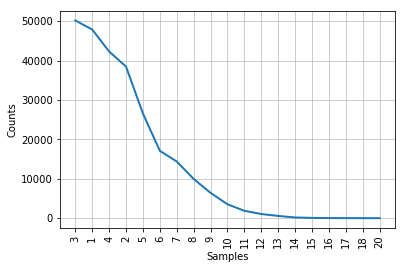

In [48]:
fdist.plot(fdist.N(), cumulative=False)